In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import add_funcs as af
import os

from scipy import integrate
from astropy.io import ascii
from tqdm import tqdm

In [9]:
#Set some global parameters

lambda_min = 5000
lambda_max = 8000

norm = 'OI' #Either 'OI' (normalising by the integrated flux of a fitted OI gaussian)
            #or 'Total' (normalising by integrated flux over range lambda_min to lambda_max)
            #or 'AJ' (normalising by Lnorm from AJ 2015)

In [11]:
#Load in the models:

string_epochs = np.array(['200d', '250d', '300d', '350d', '400d']) #Days
string_mixings = np.array(['10_90', '20_80', '30_70', '60_40'])
string_masses = np.array(['3p30', '4p00', '6p00'])

wl_lists, flux_lists, NII_flux_lists = [], [], []

for i in range(len(string_epochs)):
    
    epoch = string_epochs[i]
    local_wl_list, local_flux_list, local_NII_flux_list = [], [], []
    
    for k in range(len(string_masses)):
        for l in range(len(string_mixings)):
            
            model_name = '/NII_he' + string_masses[k] + '_AJ_' + string_mixings[l]
            spectrum_path = "/home/stba7609/Documents/Projects/" + epoch + model_name + "/out/modelspectra/spectrum.datrun001"
            data = ascii.read(spectrum_path)
            
            local_wl_list.append(data['col1'])
            local_flux_list.append(data['col2'])
            local_NII_flux_list.append(data['col15'])
            
    wl_lists.append(local_wl_list)
    flux_lists.append(local_flux_list)
    NII_flux_lists.append(local_NII_flux_list)

In [20]:
#Get the NII fitted fluxes
M_sun = 1.989*10**33 #g

NII_percentages_fit = np.zeros((3, 4, 5)) #3 masses, 4 mixings, 5 epochs
ni_masses = np.array([0.04, 0.0445, 0.0704])*M_sun
epochs = np.array([200, 250, 300, 350, 400])

distance = 10*10**6 *3.086*10**18 #10 Mpc
surface = 4*np.pi*distance**2

for i in tqdm(range(len(string_masses))):
    M_Ni = ni_masses[i]
    for j in tqdm(range(len(string_mixings))):
        for k in range(len(string_epochs)):
            
            wl, flux = np.array(wl_lists[k][4*i + j]), np.array(flux_lists[k][4*i + j])
            
            zoom_mask = (wl > lambda_min) * (wl < lambda_max)
            wl_zoom, flux_zoom = wl[zoom_mask], flux[zoom_mask]
            
            NII_integrated_flux, popt = af.observed_flux_from_fit(wl_zoom, flux_zoom)
            
            if norm == 'OI':
                norm_mask2 = (wl > 6100) * (wl < 6800)
                OI_flux = af.gaussian(wl[norm_mask2], 6316, popt[0], popt[2])
                normalisation_flux = integrate.cumtrapz(OI_flux, wl[norm_mask2])[-1]
                print(NII_integrated_flux*100/normalisation_flux, i, j)
            elif norm == 'Total':
                normalisation_flux = integrate.cumtrapz(flux_zoom, wl_zoom)[-1]
            elif norm == 'AJ':
                epoch = epochs[k]
                normalisation_flux = af.Lnorm_AJ(epoch, M_Ni)/surface
            
            NII_percentages_fit[i, j, k] = NII_integrated_flux*100/normalisation_flux
    

  0%|                                                     | 0/4 [00:00<?, ?it/s]

49.00773156328135 0 0
69.38039632290979 0 0
97.33106853219122 0 0
117.47257008283165 0 0



 25%|███████████▎                                 | 1/4 [00:21<01:04, 21.62s/it]

165.79551953460765 0 0
48.77327298297659 0 1
70.91994506367251 0 1
99.05218682324217 0 1
137.4095897252477 0 1



 50%|██████████████████████▌                      | 2/4 [00:47<00:47, 23.85s/it]

229.88338747817076 0 1
51.65556583492114 0 2
79.64676416288638 0 2
110.22021900527263 0 2
176.36180273933286 0 2



 75%|█████████████████████████████████▊           | 3/4 [01:13<00:25, 25.25s/it]

374.0000360500348 0 2
55.7170526107002 0 3
88.05121540968801 0 3
158.7551620269285 0 3
353.37254024984486 0 3



 33%|███████████████                              | 1/3 [01:39<03:18, 99.15s/it]

779.1075720571857 0 3



  0%|                                                     | 0/4 [00:00<?, ?it/s]

20.720220635161233 1 0
26.600409698900606 1 0
40.889975642615894 1 0
54.65117558009035 1 0



 25%|███████████▎                                 | 1/4 [00:25<01:15, 25.01s/it]

96.50610141740518 1 0
21.194004539531587 1 1
29.549912727639782 1 1
43.8596964820426 1 1
65.44205626296979 1 1



 50%|██████████████████████▌                      | 2/4 [00:50<00:50, 25.31s/it]

119.21667286593143 1 1
19.983314623810084 1 2
31.691358312903667 1 2
46.51073880467643 1 2
81.66082915426921 1 2



 75%|█████████████████████████████████▊           | 3/4 [01:15<00:25, 25.13s/it]

147.92106902924147 1 2
23.452736230401626 1 3
32.57227089016361 1 3
64.14498142388993 1 3
141.54361229253942 1 3



 67%|██████████████████████████████               | 2/3 [03:19<01:39, 99.64s/it]

245.68706974312946 1 3



  0%|                                                     | 0/4 [00:00<?, ?it/s]

6.654482755309566 2 0
7.041658520938535 2 0
9.880610465930136 2 0
15.20504185823028 2 0



 25%|███████████▎                                 | 1/4 [00:24<01:14, 24.80s/it]

25.074485545520826 2 0
4.76385782437082 2 1
7.611503195228406 2 1
10.757710262460943 2 1
17.089991615119796 2 1



 50%|██████████████████████▌                      | 2/4 [00:49<00:49, 24.92s/it]

30.91904211917375 2 1
5.2664021555062925 2 2
7.907166349391896 2 2
13.182059076449793 2 2
16.824911882094685 2 2



 75%|█████████████████████████████████▊           | 3/4 [01:15<00:25, 25.19s/it]

37.93736542281566 2 2
5.004909590962773 2 3
6.0043098414586655 2 3
8.757171344512072 2 3
17.02696059126901 2 3



100%|█████████████████████████████████████████████| 3/3 [04:59<00:00, 99.86s/it]

35.11993012352623 2 3


In [13]:
plt.rcParams["font.size"] = 20

In [14]:
print(NII_percentages_fit)
print(af.Lnorm_AJ(200, 0.04*M_sun))

[[[ 49.00137915  69.3714032   97.32763817 117.45734322 165.77402902]
  [ 48.75555836  70.89418668  99.01621071 137.39177862 229.85358986]
  [ 51.61251689  79.58038779 110.12836319 176.21482556 373.86419789]
  [ 55.4576171   87.64122222 157.64812801 350.90839725 771.42413069]]

 [[ 20.71753487  26.59696174  40.88467546  54.64409166  96.49359224]
  [ 21.1863068   29.53918009  43.84376648  65.41828747 119.17337294]
  [ 19.96666084  31.66494723  46.47197748  81.59277429 147.79779392]
  [ 23.38483316  32.47796389  63.95926146 141.13379887 244.97572815]]

 [[  6.64353293   7.0300716    9.86435211  15.18002225  25.03322595]
  [  4.75006495   7.59897861  10.74000865  17.06187036  30.86816542]
  [  5.25115426   7.88427261  13.14389286  16.77619845  37.82752478]
  [  4.98160521   5.97635195   8.7163953   16.94767789  34.95640107]]]
9.388619810999974e+40


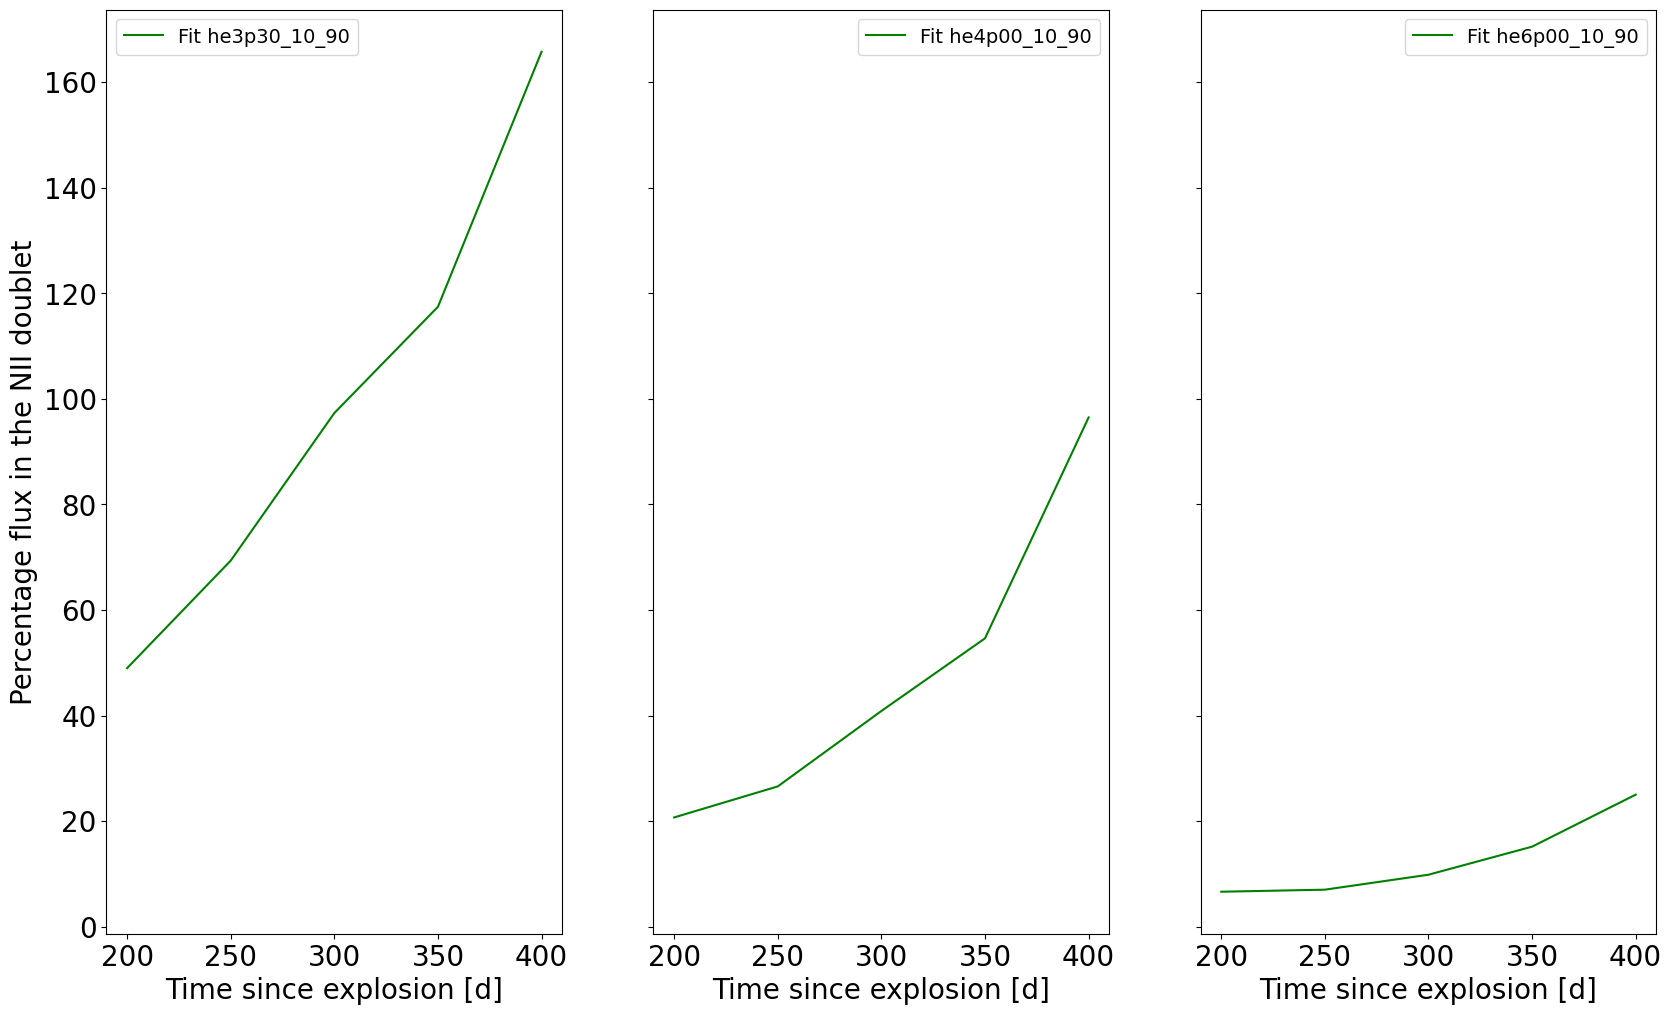

In [16]:
#Make the plot
fig, ax = plt.subplots(1, 3, sharex = True, sharey = True)

colours = ['green', 'yellow', 'orange', 'red']

epochs_2011dh = np.array([152, 202, 208, 239, 268, 292, 301, 359, 416])
percentages_2011dh_4200 = np.array([3.5, 3.7, 3.7, 5.1, 5.4, 6.4, 6.7, 7.8, 8.4 ])
percentages_2011dh_5000 = np.array([4.4, 4.9, 5.2, 5.8, 7.3, 8.2, 8.5, 11, 11])
percentages_2011dh_AJnorm = np.array([0.533, 0.364, 0.379, 0.303, 0.31, 0.3, 0.256, 0.259, 0.179])

epochs_2007Y = np.array([219, 248, 288])
percentages_2007Y_4200 = np.array([5.2, 7.9, 9.2])
percentages_2007Y_5000 = np.array([6.8, 10.1, 11.6])
percentages_2007Y_AJnorm = np.array([0.196, 0.193, 0.139])

epochs_2008ax = np.array([280, 328, 359])
percentages_2008ax_5000 = np.array([5.2, 5.3, 9])

epochs_2004dk = np.array([283, 342])
percentages_2004dk_5000 = np.array([2.54, 3.1])

epochs = np.array([200, 250, 300, 350, 400])

for i in range(len(string_masses)):
    
    
    for j in range(1):
        
        this_label = "Fit he" + string_masses[i] + "_" + string_mixings[j]
        ax[i].plot(epochs, NII_percentages_fit[i, j, :], color = colours[j], label = this_label)
        
    #ax[i].plot(epochs_2011dh, percentages_2011dh_4200, linestyle = '--', color = 'black', label = '2011dh')
    #ax[i].plot(epochs_2011dh, percentages_2011dh_5000, linestyle = '--', color = 'black', label = '2011dh')
    #ax[i].plot(epochs_2007Y, percentages_2007Y_5000, linestyle = ':', color = 'black', label = '2007Y')
    #ax[i].plot(epochs_2008ax, percentages_2008ax_5000, linestyle = '-', color = 'black', label = '2008ax')
    #ax[i].plot(epochs_2004dk, percentages_2004dk_5000, linestyle = '-.', color = 'black', label = '2004dk')
    ax[i].set_xlabel('Time since explosion [d]')
    ax[i].legend(fontsize = 14)
    
ax[0].set_ylabel('Percentage flux in the NII doublet')
fig.set_size_inches(20, 12)

#plt.savefig('NII_Time_Tracks_newff_Totalnorm.png')
plt.show()

In [ ]:
for i in range(5):
    
    wl, flux = np.array(wl_lists[i][0 + 3]), np.array(flux_lists[i][0 + 3])
            
    zoom_mask = (wl > lambda_min) * (wl < lambda_max)
    wl_zoom, flux_zoom = wl[zoom_mask], flux[zoom_mask]
    
    plt.plot(wl_zoom, flux_zoom/np.max(flux_zoom))
    
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()